# Introduction
This homework consists of two parts: in the first part, you will solve problems using the material from the lectures; in the second part you will get started with [PyTorch](https://pytorch.org/docs/stable/index.html). 

The first section consists of three problems:
1. [Huffman algorithm](https://en.wikipedia.org/wiki/Huffman_coding) for encoding symbols  
    __Note__: For this problem, you are not required to submit any code; however, you might find it faster/more convenient to implement the algorithm yourself.
2. [Documents representation](https://en.wikipedia.org/wiki/Bag-of-words_model) and similarity metrics  
    __Note__: For this problem, the starter code is written for you. Complete the missing parts to answer the questions.
3. Formulation of NLP tasks in terms of Machine Learning  
    __Note__: You don't need to submit any code for this problem.

In the second section, you will be asked to complete the missing code that aims to parse and format the input data. Upon completion of the assignment, you will have a dataset that is ready to be loaded in a [model](https://en.wikipedia.org/wiki/Word2vec) that you will be training in the next homework. Feel free to use your code in further homeworks and in your project.

__You will need__ to have the following libraries installed (please make sure you followed the installation instructions in the class repository to install them):
- [NLTK](http://www.nltk.org/)
- [NumPy](http://www.numpy.org/)
- [PyTorch](https://pytorch.org/)


__You will learn:__
- How to represent documents in a numeric form
- How to use different similarity metrics used in NLP
- How to formulate a given problem as a machine learning problem
- Basics of PyTorch data loading and processing
  - How to convert input data to numeric representation
  - How to use built-in `Dataset` and `DataLoader` classes

Once you complete this assignment, submit it as:

`submit arum hw2 <name_of_your_notebook> <additional_files>`


In [1]:
# Make sure that execution of this cell doesn't return any errors. If it does, go the class repository and follow the environment setup instructions
import string
from queue import PriorityQueue
from collections import defaultdict, Counter

import nltk
import math
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from nltk import word_tokenize

# Theoretical problems

## Problem 1. Huffman code
_Headi_ is an artificially created language that uses the only the first 10 letters
English alphabet. The following is a table of relative frequencies of symbols in
Headi text:

|Letter|Frequency|Letter|Frequency|
|---|---|---|---|
|a|8.1%|g|0.7%|
|b|1.4%|h|4.0%|
|c|2.7%|i|7.4%|
|d|4.2%|j|9.0%|
|e|12.7%|space|43.8%|
|f|6.0%|

__Instructions__:

For this problem, please do the following:

 1. Paste your answers to the following questions into the notebook; if you write any code for this problem, please also include it.
 2. Submit the diagram of the resulting tree; please submit this electronically; it could just be a scan or a photo of a hand-drawn diagram, submitted as a separate file.

#### 1.1 Build a Huffman code for this language. Show your work.
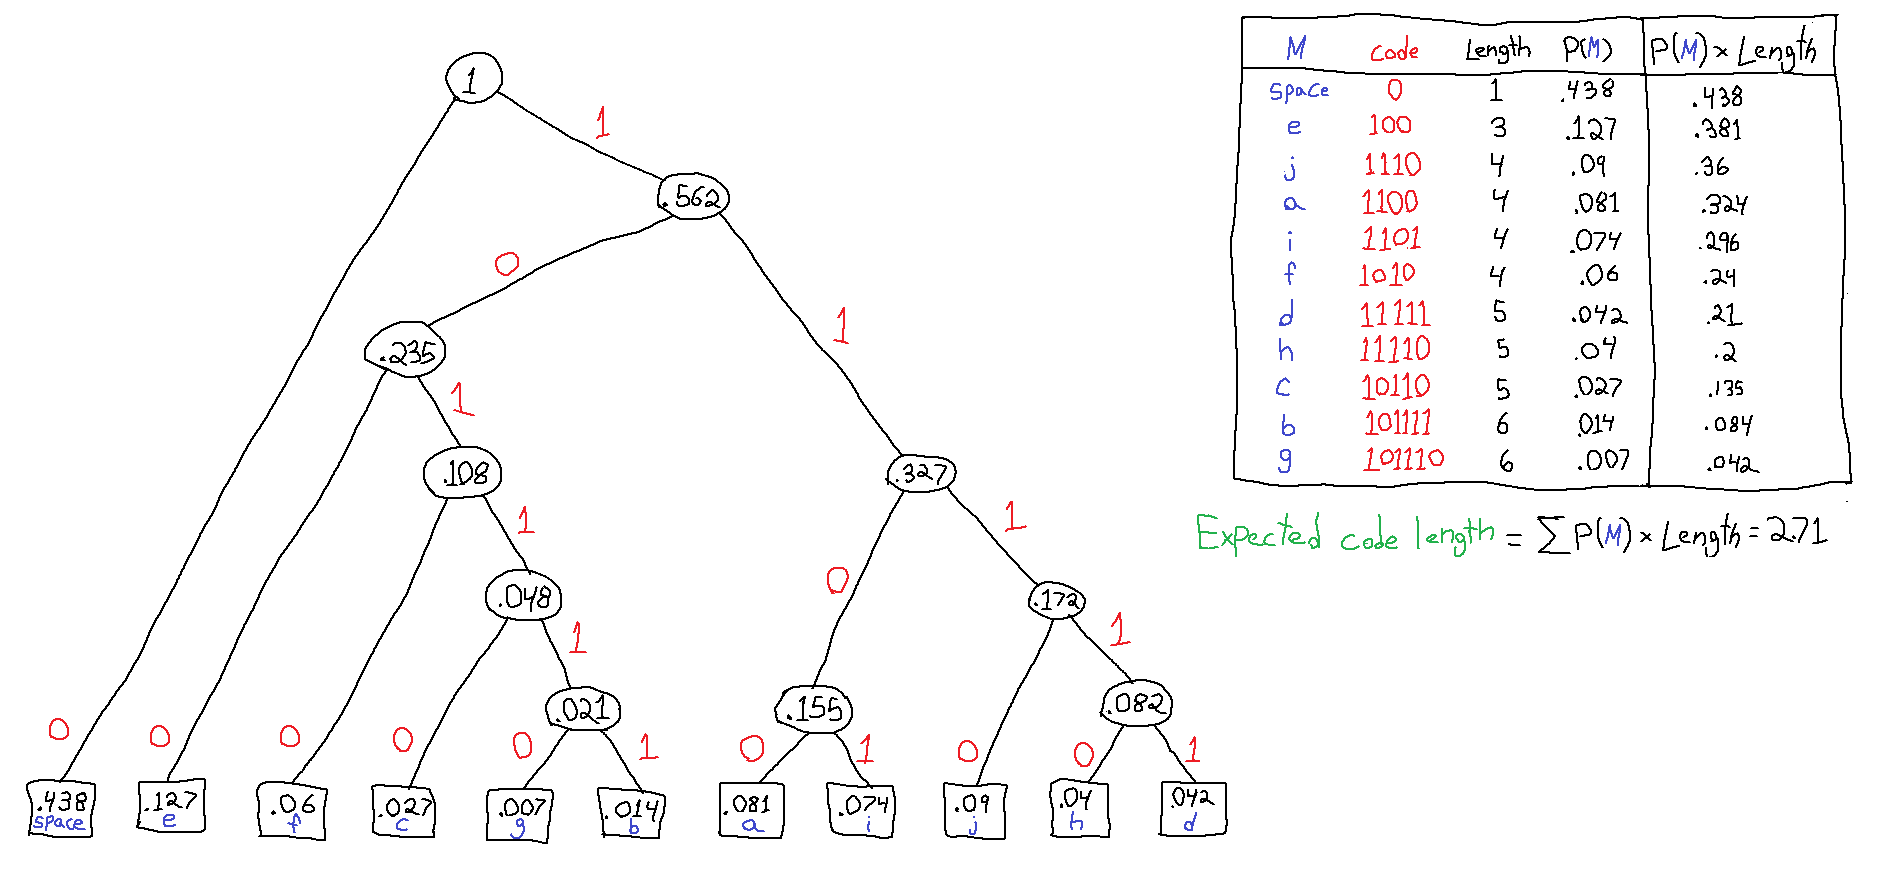


### 1.2 Record the word "Headi" using the resulted code

**<font color=red>h____</font><font color=blue>e__</font><font color=red>a___</font><font color=blue>d___</font><font color=red>i___</font>**<br>
**<font color=red>11110</font><font color=blue>100</font><font color=red>1100</font><font color=blue>11111</font><font color=red>1101</font>**<br>

   
   

### 1.3 What is the expected length of an encoded message consisting of 100 letters?

Expected length of code for 1 letter = 2.71 bits <br>
2.71 bits * 100 letters = 271 bits <br>

###  1.4 What is the entropy of the probability distribution over Headi symbols?

H(p) = H(X) = - Σ (P(x) * log(P(x))) <br>
The entropy of the probability distribution is equal to the sum of each letters probability multiplied by log of that probability.<br>

    -{.438 * log(.438)
    + .127 * log(.127)
    + .09  * log(.09)
    + .081 * log(.081)
    + .074 * log(.074)
    + .06  * log(.06)
    + .042 * log(.042)
    + .04  * log(.04)
    + .027 * log(.027)
    + .014 * log(.014)
    + .007 * log(.007)}
H(p) = 

###  1.5 Jensen-Shannon divergence

[Jensen-Shannon divergence](https://en.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence) is a measure of similarity between two probability distributions. It is widely used in machine learning in general and NLP in particular.

_Idaeh_ and _Iliat_ are two other languages that use only the first 10 letters of the
English alphabet. Below are the tables of relative frequencies of symbols in
Idaeh and Iliat texts:

_Idaeh_

|Letter|Frequency|Letter|Frequency|
|---|---|---|---|
|a|7.1%|g|0.7%|
|b|2.4%|h|3.0%|
|c|2.7%|i|8.4%|
|d|3.2%|j|9.0%|
|e|14.7%|space|42.8%|
|f|6.0%|

_Iliat_

|Letter|Frequency|Letter|Frequency|
|---|---|---|---|
|a|1.1%|g|0.7%|
|b|8.4%|h|10.0%|
|c|2.7%|i|1.4%|
|d|4.2%|j|29.0%|
|e|12.7%|space|23.8%|
|f|6.0%|


__Question__:
Calculate the Jensen-Shannon divergence between each of these two languages and the _Headi_ language. Which language, Idaeh or Iliat, is closer to Headi in terms of Jensen-Shannon divergence (in other words, the divergence is lower)?

__YOUR ANSWER HERE__

## Problem 2. Computing similarity
In this problem you will learn about the simplest way to represent a single document and will practice finding similarities between two documents. Follow the instructions below to complete the missing code and answer the questions.

Consider two documents $D_1$ and $D_2$:

$D_1$:

```
dance little baby, dance up high,
never mind baby, mother is nigh;
crow and caper, caper and crow,
there little baby, there you go;
```

$D_2$:

```
up to the ceiling, down to the ground
backwards and forwards, round and round.
dance little baby, mother will sing,
with the merry coral, ding, ding, ding.
```

Consider a vector representation for each document that tracks _how many times each token occured in that document_. You can assume that the punctuation tokens are discarded.

For example, the following document

```
Jingle bells, jingle bells, jingle all the way
```

would be represented by the vector:

$\langle jingle: 3, bells: 2, all: 1, the: 1, way: 1 \rangle$

### 2.1 Compute the following similarity measures for these two documents:

#### - Cosine similarity
#### - Euclidean distance

------
In order to compute the measures you will need to do the following:
1. Tokenize both documents ignoring punctuation
2. Build the representation of each of the documents based on the counts of the words it contains
3. Calculate the similarity measures using the following equations:

    $\text{Cosine similarity} = \frac{\mathbf{D_1}\mathbf{D_2}}{||\mathbf{D_1}|| ||\mathbf{D_2}||}$

    $\text{Euclidean distance} = \sqrt{\sum_i{(D_{1_i} - D_{2_i})^2}}$


#### Instructions:
1. Complete the code in the `tokenize_doc` function that takes the input text and returns a list of tokens
2. Complete the code in the `get_doc_vector` function that takes a list of tokens of a given document and a vocabulary consisting of tokens that will be counted in every document
3. Complete the code in the `cosine_similarity` function that takes two vectors and returns a single float number reflecting the cosine similarity of the two vectors
4. Complete the code in the `euclidean_distance` function that takes two vectors and returns a single float number reflecting the euclidean distance between the two vectors

__Notes__:
- In the previous homework you familiarized yourself with the `spaCy` library that efficiently processes input text. In the current problem, however, you are only required to do very basic tokenization of very short texts. For such purposes you can use the `nltk` library, which is another widespread tool for processing raw texts. Use `word_tokenize` function to obtain the tokens.
- Make sure you ignore punctuation when you tokenize. You might find `string.punctuation` from the `string` package helpful.
- Counting tokens should be easier if you use `Counter` class or `defaultdict` class from the `collections` package.
- Note that one of the measures reflects how close two vectors are, while the other computes the distance between them. Despite different meanings, both are widely used in practice.


In [2]:
doc1 = """dance little baby, dance up high,
never mind baby, mother is nigh;
crow and caper, caper and crow,
there little baby, there you go;"""

doc2 = """up to the ceiling, down to the ground
backwards and forwards, round and round.
dance little baby,mother will sing,
with the merry coral, ding, ding, ding."""

In [3]:
def tokenize_doc(doc):
    """
    Tokenize the document and return a list of tokens (lowercased) discarding all punctuation.
    Args:
        doc (str): The input document
    Returns:
        tokens (list): A list of tokens
    """
    tokenizer=nltk.tokenize.RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(doc)
    
    return tokens


In [4]:
def get_doc_vector(tokens, vocab):
    """
    Represent a document as a numerical vector of the length |vocab|
    Args:
        tokens (list): A list of tokens in the document
        vocab (list): list of all possible unique tokens
    Returns:
        doc_vector (numpy array): a numerical vector representation of the document
    """
    doc_vector = []
    i = 0
    
    while i < len(vocab):
        doc_vector.append(tokens.count(vocab[i]))
        i += 1
        
    return doc_vector


In [5]:
def cosine_similarity(vec1, vec2):
    """
    Compute cosine similarity between two vectors of the same shape
    Args:
        vec1 (numpy array): The first vector of the shape (1, V)
        vec2 (numpy array): The second vector of the shape (1, V)
        
    Returns:
        similarity (float): The similarity between two vectors
    """
    
    i = 0
    numerator = 0
    denominatorA = 0
    denominatorB = 0
    
    while i < len(vocab):
        numerator = numerator + (vec1[i] * vec2[i])
        i += 1
        
    i = 0
    while i < len(vocab):
        denominatorA = denominatorA + (vec1[i] ** 2)
        i += 1
       
    i = 0
    while i < len(vocab):
        denominatorB = denominatorB + (vec2[i] ** 2)
        i += 1
        
    similarity = numerator / (denominatorA * denominatorB)
  
    
    return similarity

In [6]:
def euclidean_distance(vec1, vec2):
    """
    Compute euclidean distance between two vectors of the same shape
    Args:
        vec1 (numpy array): The first vector of the shape (1, V)
        vec1 (numpy array): The second vector of the shape (1, V)
        
    Returns:
        similarity (float): The L2 distance between two vectors
    """
    
    distance = 0
    i = 0
    while i < len(vocab):
        distance = distance + ((vec1[i] - vec2[i]) ** 2)
        i += 1
        
    return distance

In [7]:
# Tokenize
doc1_tokens = tokenize_doc(doc1)
doc2_tokens = tokenize_doc(doc2)

# Construct voabulary
vocab = sorted(list(set(doc1_tokens).union(set(doc2_tokens))))

# Get numeric representations
doc1_vector = get_doc_vector(doc1_tokens, vocab)
doc2_vector = get_doc_vector(doc2_tokens, vocab)

# Check the dimensions
assert len(doc1_vector) == len(doc2_vector)

# Compute the measures
cos = cosine_similarity(doc1_vector, doc2_vector)
dist = euclidean_distance(doc1_vector, doc2_vector)

# Print the output
print("Cosine similarity between the documents is {:.4f}".format(cos))
print("Euclidean distance between the documents is {:.4f}".format(dist))

Cosine similarity between the documents is 0.0069
Euclidean distance between the documents is 61.0000


### 2.2 $D_1$ and $D_2$ are merged into a single document. Consider all the lines in the resulting document.

- What is the probability of the word “little” occuring in a given line?
- What is the probability of the word “baby” occuring in a given line?
- What is the pointwise mutual information (PMI) association score between “little” and “baby”?
----

To solve this problem, you will need to count both words in every line. The code that merges two documents, splits the result in separate lines, and tokenizes every line is written for you.

__Instructions__:
- Complete the code below to compute the probabilities
- Use the obtained probabilities to compute the PMI score according to the definition of PMI:

    $ \text{PMI} =\log_2{\frac{P(x,y)}{P(x)P(y)}}$
- Once the code is complete, run the cells below to output the answer.

In [8]:
doc_merged = doc1 + '\n' + doc2
doc_lines = [l.strip() for l in doc_merged.split('\n')]
doc_lines = [tokenize_doc(l) for l in doc_lines if l]

i = 0
count_little = 0
while i < len(doc_lines):
    if 'little' in doc_lines[i]:
        count_little += 1
    i += 1

i = 0
count_baby = 0
while i < len(doc_lines):
    if 'baby' in doc_lines[i]:
        count_baby += 1
    i += 1
    
i = 0
count_little_baby = 0
while i < len(doc_lines):
    if 'little' in doc_lines[i]:
        if 'baby' in doc_lines[i]:
            count_little_baby += 1
    i += 1



probability_little = count_little / len(doc_lines)
probability_baby = count_baby / len(doc_lines)
probability_little_baby = count_little_baby / len(doc_lines)
pmi_little_baby = math.log((probability_little_baby/(probability_little * probability_baby)),2)


In [9]:
print('Probability of "little":', probability_little)
print('Probability of "baby":', probability_baby)
print('Probability of "little baby":', probability_little_baby)
print('PMI association score between “little” and “baby” is {}'.format(pmi_little_baby))
print(doc_lines[0])

Probability of "little": 0.375
Probability of "baby": 0.5
Probability of "little baby": 0.375
PMI association score between “little” and “baby” is 1.0
['dance', 'little', 'baby', 'dance', 'up', 'high']


## Problem 3. NLP problem setup
Encyclopedia Britannica’s 3rd edition contains approximately ten thousand articles. After being scanned and converted to text using optical character recognition software, you are given a segment of it in a single text file. The file contains 100,000 text lines / 900,000 words / 300 articles, and has been manually marked up for article start and article finish. 

For your reference, an excerpt from the raw text and the marked text is given in the files `brit3-excerpt.txt` and `brit3-excerpt-marked.txt` correspondingly. Feel free to open these files in your favorite text editor and have a look.

---
__Instructions__:
For each of the questions in each of the two problems below, give a 1-2 sentence answer. You don't have to write any code for this problem. Please fill out your answers in the cells below (as markdown text). Note that this problem does not have a single best answer. Use your imagination and be creative!

### 3.1 Imagine that you need to build a system that would split the given text into articles. Describe how you can cast this task as a classification problem:

1. What are the instances that you will need to classify?
2. What are the labels for the instances that your classification function will need to assign?
3. Assuming you use 2/3 of your marked up data for training how many instances will you have in your training set?
4. Give at leaves 5 examples of boolean features you might wish to include when building such a classifier.

__YOUR ANSWER HERE__

### 3.2 Now imagine that you need to build a system that would both split the text into articles and identify article titles. Again, assume that the titles have been marked in your training set. How can you cast this task as a classification problem? 
Please specify answers to (1), (2), (3), and (4) above for this new task.

__YOUR ANSWER HERE__

# PyTorch practice

In this part of homework you will be focusing on how to clean a given dataset and prepare it for training a skip-gram model.
Skip-gram model is one of commonly used models to train [word embeddings](https://en.wikipedia.org/wiki/Word2vec#CBOW_and_skip_grams). Essentially, skip-gram model is a neural network that, given a target word, predicts one of the words from the context window (usually the context is 3-10 words on the left and 3-10 words on the right).

This part of the homework consits of three main parts:
 1. Data cleaning and preprocessing. In this part you will load the source corpus and tokenize it.
 2. A vocabulary class that you need to implement. This class is essential in NLP, and it's a good idea to reuse it in your future work
 3. Dataset class. This class is specific for the task at hand. In our case, it should handle the creating of the $(\text{target_word},\text{context_word})$ pairs


We will train model on the `text8` corpus ([http://mattmahoney.net/dc/textdata.html](http://mattmahoney.net/dc/textdata.html)), which is already downladed and saved as the `text8.txt` file. This corpus consists of the first $10^9$ bytes of the English Wikipedia dump on Mar. 3, 2006.

PyTorch provides a number of tools for data preparation that you will be using throughout the homework. Once you complete this homework, feel free to use (and change if needed) the implemented functions and classes in further assignments and in your projects.

__Note__: In this part you will not implement the skip gram model itself - this is left for future homeworks

In [10]:
# Loading the corpus
with open('text8.txt') as f:
    data = f.read()

print('There are', len(data), 'characters in total')
print('The first 100 characters are:\n', data[:100])

There are 100000000 characters in total
The first 100 characters are:
  anarchism originated as a term of abuse first used against early working class radicals including t


### 1. Dataset preprocessing
We will start our workflow with parsing the input data file(-s). In general, depending on the problem you are solving and the input format of the given data, you might address text filtering differently. In our case, the text preprocessing stage will include the following steps:

- Removing punctuation
- Converting the input document to a seqence of tokens

__Note__: In some cases it might be beneficial to lowercase the input data; however, our corpus here is already lowercased.

----
__Instructions__:

- Complete the code in `preprocess` and the cells below to answer the questions.

In [11]:
def preprocess(data):
    """
    Args:
        data (str):
    Returns: a list of tokens

    """
    tokens = tokenize_doc(data)


    return tokens

In [12]:
tokens = preprocess(data)

#### 1.1 How many tokens in total are in your input data?

In [13]:
print(len(tokens))

17005207


#### 1.2 What is the 64th token?

In [14]:
print(tokens[63])

by


### 2. Vocabulary
Before the data gets loaded into the model, it has to be converted from raw text to a numeric representation. One way to achieve this is to introduce a token-to-id mapping. More specifically, you will implement a vocabulary class that maintains the mapping between tokens and their IDs, and that is able to flexibly add tokens and prune the vocabulary based on the token counts.

When the input dataset is very large, vocabulary pruning is widely used in practice for more efficient memory usage.

----

__Instructions__:

- Complete the code in `Vocabulary` class and the cells below to answer the questions.

In [15]:
class Vocabulary:
    def __init__(self, special_tokens=None):
        self.w2idx = {}
        self.idx2w = {}
        self.w2cnt = defaultdict(int)
        self.special_tokens = special_tokens
        if self.special_tokens is not None:
            self.add_tokens(special_tokens)

    def add_tokens(self, tokens):        
        for token in tokens:         
            if self.__contains__(token) == 0:
                self.add_token(token)
            self.w2cnt[token] += 1
        
    def add_token(self, token):        
        self.w2idx[token] = self.__len__()
        self.idx2w[self.__len__() - 1] = token

    def prune(self, min_cnt=2):
        i = 0
        
        while i < len(self.w2idx):
            if self.w2cnt[self.idx2w[i]] < min_cnt:
                del self.w2idx[self.idx2w[i]]
                del self.w2cnt[self.idx2w[i]]
                del self.idx2w[i]
            i += 1
            
            

                               
    def __contains__(self, item):
        return item in self.w2idx
    
    def __getitem__(self, item):
        if isinstance(item, str):
            return self.w2idx[item]
        elif isinstance(item , int):
            return self.idx2w[item]
        else:
            raise TypeError("Supported indices are int and str")
    
    def __len__(self):
        return(len(self.w2idx))

In [16]:
voc = Vocabulary(['UNK'])
voc.add_tokens(tokens)
print(voc.idx2w[voc.w2idx['anarchism']])
print(voc.w2cnt['UNK'])

anarchism
1


#### 2.1 How many unique tokens are in your vocabulary?

In [17]:
print("The vocabulary consists of", voc.__len__(), "unique tokens")

The vocabulary consists of 253855 unique tokens


#### 2.2 What is the most frequent token? How many times does it appear in the dataset?

In [18]:
current_max = 0
id_current_max = 0

for token in vocab:
    if voc.w2cnt[token] > current_max:
        current_max = voc.w2cnt[token] 
        id_current_max = voc.w2idx[token]


print('"' ,voc.idx2w[id_current_max], '"', "is the most frequent token in the dataset, ")

print("appearing", current_max, "times.")

" the " is the most frequent token in the dataset, 
appearing 1061396 times.


#### 2.3 If you cut all the tokens that appear no more than 2 times in your dataset, how many unique tokens will your vocabulary contain?
Hint: use the `prune` function here

In [19]:
voc.prune()
print("The pruned vocab contains",voc.__len__(),"unique tokens.")

The pruned vocab contains 185615 unique tokens.


### 3. Dataset
The Dataset class provided by PyTorch is an abstract class representing any dataset used as input to a model. It is conveniently designed in a way that all the classes subclassing it would only have to override `__len__` and `__getitem__` methods. 

In this task you will subclass the Dataset class and implement your own `__len__` and `__getitem__` methods.
Additionally, and specific to our case, you'll implememnt the `_generate_pairs` method, that will return all possible paris of $(\text{target_word},\text{context_word})$ given the input text.

The goal of the `__getitem__` method is, given an index, to return the corresponding pair converted into the numerical representation using the vocab object.

You might find it useful to have a look at the official [Data Loading and Processing Tutorial](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html) on the PyTorch website.

---

__Instructions__:
- Complete the code in `SkipGramDataset` class and the cells below to answer the questions.

__Note__: since we pruned our vocabulary, we need to filter out pairs that are not not in our pruned vocabulary.

In [20]:
class SkipGramDataset(Dataset):
    def __init__(self, data, vocab, skip_window=3):
        super().__init__()

        self.vocab = vocab
        self.data = data
        self.skip_window = skip_window

        self.pairs = self._generate_pairs(data, skip_window)

    def _generate_pairs(self, data, skip_window):
        """
        Args: input data (a list of tokens) and the window size
        Returns: all possible pairs for the SkipGram mode
        """
        pairs = []

        # do not forget to filter out pairs with out-of-vocabulary tokens 
        ### YOUR CODE BELOW ###

        ### YOUR CODE ABOVE ###
                
        return pairs


    def __getitem__(self, idx):
        """
        Args:
            idx
        Returns:

        """
        ### YOUR CODE BELOW ###
        
        ### YOUR CODE ABOVE ###

        return pair

    def __len__(self):
        """
        Returns
        """
        return len(self.pairs)

#### 3.1 Initialize your `SkipGramDataset` class using the data and the vocab objects with `skip_window=2`. Print out the 43rd pair and 43rd item in the dataset.

In [21]:
### YOUR CODE BELOW ###

### YOUR CODE ABOVE ###

#### 3.2 What is the total length of the dataset (that is, the total number of pairs)?

In [22]:
### YOUR CODE BELOW ###

### YOUR CODE ABOVE ###

#### 3.3 Print out the 43rd pair and 43rd item in the dataset.

In [23]:
### YOUR CODE BELOW ###

### YOUR CODE ABOVE ###

### 4. DataLoader
DataLoader is another useful class of PyTorch that combines a dataset and a sampler, and provides single- or multi-process iterators over the dataset. The goal of data loader is to create batches of training examples for the network by sampling the dataset and combining the sampled items into batches. 

__Instructions__:
- Complete the code in in the cells below to answer the questions.

In [24]:
dataloader = DataLoader(dataset, shuffle=True, batch_size=20)

NameError: name 'dataset' is not defined

#### 4.1 How many batches of size 20 would you need to fit all training examples in the dataset?

In [ ]:
### YOUR CODE BELOW ###

### YOUR CODE ABOVE ###

#### 4.2 Verify the number above by using the `len` function on the dataloader object

In [ ]:
### YOUR CODE BELOW ###

### YOUR CODE ABOVE ###

Now, after you have a dataloader, you can iterate over it to dynamically create batches of the traning samples. An example of a training loop is given below:
```python
for epoch in range(100):
    for i, batch in enumerate(dataloader):
        x, y = batch

        # use x, y to train the model
```

In [ ]:
# Let's see what's inside a batch
batch = next(iter(dataloader))
print("The batch size is {}".format(len(batch)))
pair_target, pair_context = batch
print("The batch of target word indices is: \n{}".format(pair_target))
print("The batch of context word indices is: \n{}".format(pair_context))